Análisis bajo riesgo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para ver la última versión online en `nbviewer`. 

---

A continuación se desarrolla el mismo caso anterior pero considerando que el precio y la producción son variables aleatorias.

In [1]:
import numpy as np
import numpy.random as rdn
import cashflows as cf

In [2]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            costo,
            inversion):
    
    
    precio      = rdn.triangular(  8,  10,  12, 10)
    produccion  = rdn.triangular( 80, 100, 120, 10)

    
    ingre = cf.cashflow(const_value = [0] + (precio*produccion).tolist(), start=2018)  
    opera = cf.cashflow(const_value = [0] + [costo] * 10, start=2018)
    inver = cf.cashflow(const_value = [inversion] + [0] * 10, start=2018)
    
    asset = cf.cashflow(const_value=[inversion] + [0] * 10, start=2018)
    life  = cf.cashflow(const_value=[5] + [0]*10, start=2018)
    
    dep   = cf.depreciation_sl(costs = asset, life=life)['Depr']
    
    antes = ingre - opera - inver - dep
    desp  = cf.after_tax_cashflow(antes, cf.interest_rate([30] * 11, start=2018))
    neto  = antes + dep
    
    npv   = cf.timevalue(cflo=neto, prate=marr)
    
    return npv

In [3]:
marr = cf.interest_rate([10] * 11, start=2018)
project(marr, 220, 2000)

2464.7584256379441

In [4]:
import matplotlib.pyplot as plt

In [5]:
result = []

for sim in range(1000):
    result.append(project(marr, 220, 2000))
result[1:10]

[3142.5142527900798,
 2633.7423158920528,
 2980.5819705687368,
 2864.4818035430476,
 2830.550890203167,
 2992.0315599528285,
 2641.3274230367315,
 3143.5819037390729,
 2614.1423871337356]

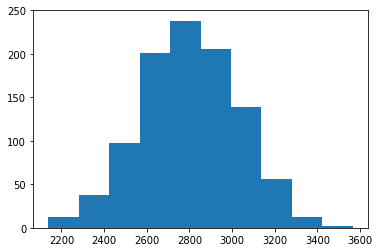

In [6]:
plt.hist(result)
plt.show()

**Ejercicio.--** Incluya en la simulación a las variables costo e inversión.

Análisis bajo riesgo
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/ingenieria-economica/blob/master/13-montecarlo.ipynb) para ver la última versión online en `nbviewer`. 

---